# Analyzing Data for Rotational Churners

**Group 6 and Contributions**
 - Timothy Chan - Recent User and Churner Similarity
 - Ryhle Nodnylson Guinto - Visualizations
 - Chino Laguda - Visualizations
 - Randall Joseph Pajaro - Mock Dataset / Recent User and Churner Similarity / Visualizations

Loading the churner data and data of the newer/more recent users

In [1]:
import numpy as np
import pandas as pd

dfs = pd.ExcelFile('data/mock/sample_mock_c_data.xlsx')
sheets = dfs.sheet_names
d = []
for i in range(10):
    d.append(dfs.parse(sheet_name=sheets[i]))

newer_users = pd.read_excel('data/mock/sample_mock_rc_data.xlsx')

In [2]:
d[0].head()

,weeks,IMEI,phone_nums,credits_loaded_per_week,num_hrs_spend_on_net,mobile_data_usage(gb),promos_used,active_times,activity_status
0,2018-04-17,939022743589095,9334425708,0,11.1,8.45,0,1,0
1,2018-04-24,939022743589095,9334425708,0,6.5,5.73,6,1,0
2,2018-05-01,939022743589095,9334425708,0,17.7,8.28,5,2,0
3,2018-05-08,939022743589095,9334425708,0,22.3,7.34,3,0,0
4,2018-05-15,939022743589095,9334425708,0,15.4,8.98,4,1,0


In [3]:
newer_users.head()

,weeks,IMEI,phone_nums,credits_loaded_per_week,num_hrs_spend_on_net,mobile_data_usage(gb),promos_used,active_times,activity_status
0,2019-04-09,916288205654472,9667616603,0,11.1,7.2,0,0,0
1,2019-04-16,916288205654472,9667616603,0,6.5,5.7,4,0,0
2,2019-04-23,916288205654472,9667616603,20,18.2,7.3,4,1,0
3,2019-04-30,916288205654472,9667616603,0,22.3,6.4,3,1,0
4,2019-05-07,916288205654472,9667616603,30,15.4,9.0,5,1,0


In [4]:
df1 = d[0].iloc[:-4, :-3]
df2 = newer_users.iloc[:len(df1), :-3]
df3 = d[3].iloc[:len(df1), :-3]
print(len(df1), ' ', len(df2), ' ', len(df3))

46   46   46


# Using Euclidean Distance to Compare how Similar the New User is to a Churner

In [5]:
def Euclidean_Dist(df1, df2, cols=d[0].columns[3:-3]):
    return (np.linalg.norm(df1[cols].values - df2[cols].values, axis=1))

In [6]:
df1.head()

,weeks,IMEI,phone_nums,credits_loaded_per_week,num_hrs_spend_on_net,mobile_data_usage(gb)
0,2018-04-17,939022743589095,9334425708,0,11.1,8.45
1,2018-04-24,939022743589095,9334425708,0,6.5,5.73
2,2018-05-01,939022743589095,9334425708,0,17.7,8.28
3,2018-05-08,939022743589095,9334425708,0,22.3,7.34
4,2018-05-15,939022743589095,9334425708,0,15.4,8.98


In [7]:
distances = Euclidean_Dist(df1, df2)
distances

array([1.25000000e+00, 3.00000000e-02, 2.00302371e+01, 9.40000000e-01,
       3.00000067e+01, 1.00395269e+01, 2.00474836e+01, 2.00000025e+01,
       2.00160036e+01, 3.00189007e+01, 3.00000000e-02, 9.80000128e+02,
       3.00000150e+01, 9.48472456e-01, 6.00333241e-01, 2.00329254e+01,
       2.00362696e+01, 1.00677704e+01, 1.00000004e+02, 2.00446901e+01,
       8.00562302e-01, 1.30061524e+00, 2.00302272e+01, 4.00125180e+01,
       2.00115567e+01, 8.00000072e+02, 3.00166637e+01, 1.00909910e+01,
       2.00024024e+01, 2.00052893e+01, 0.00000000e+00, 3.00118793e+01,
       3.10000000e-01, 2.00446901e+01, 3.00003193e+02, 3.00000067e+01,
       6.66408283e-01, 3.00000067e+01, 1.00000000e+00, 2.00000000e+02,
       2.00787475e+01, 2.00227970e+01, 1.49402142e+00, 1.29630243e+00,
       2.00003026e+02, 5.00000001e+02])

In [8]:
distances.mean()

79.37684233278725

In [9]:
# comparing it to another user who is not related
distances1 = Euclidean_Dist(df2, df3)
distances1

array([   2.14590307,   71.47970411,   20.02350868,  300.60833738,
        170.05810301,  110.00298223,   50.70125837,   20.33450516,
        210.14725052,   35.72685824,   15.70002866,  850.09549517,
         40.26850506,    9.20004891,  150.02661797,    4.43806264,
         10.19217347,   70.30402833,  300.60362207,    8.68194103,
         20.80641488,   30.7009381 ,   20.4998439 ,  230.03509384,
        150.5767326 , 1000.0741047 ,   50.29455736,   25.56086071,
         20.19833904,   23.86994763,    6.24439749,   17.61391495,
        200.46190261,   23.79997689,  180.08230368,   70.31137604,
          6.87459817,  200.70007474,   20.90777128,  200.29974763,
        180.00637461,  480.08953998,   13.08373418,    2.84121453,
          1.78538511,  500.19119554])

In [10]:
distances1.mean()

133.23150596277793

### As we can see, the new user is much more similar to churner 1 compared to churner 2 when using euclidean distance.

In [11]:
df1_sums = df1.groupby('IMEI')[d[0].columns[3:-3]].sum()
df2_sums = df2.groupby('IMEI')[d[0].columns[3:-3]].sum()
df3_sums = df3.groupby('IMEI')[d[0].columns[3:-3]].sum()

In [12]:
# Modifying the Euchlidean Distance function
def Mod_Euclidean_Dist(df1,df2,cols=d[0].columns[3:-3]):
    x = df1.groupby('IMEI')[cols].sum()
    y = df2.groupby('IMEI')[cols].sum()

    return np.linalg.norm(x.values - y.values,
                   axis=1)

In [13]:
mod_distances = Mod_Euclidean_Dist(df1,df2)
mod_distances 

# the first euclidean distance result produced a much better result in terms of comparing the difference of the 2 dataframes

array([920.01279453])

# Different Mathematical Approach for Comparing

Computation:
 - a = list of sums in each column of df1
 - b = list of sums in each column of df2
 - c = l/h (list of similarities per column; l = lower value in a certain index of lists a and b; h = higher value)

 similarity = (sum(c)/len(c))*100

In [14]:
def average_similarity(df1_sums, df2_sums):
    percent_sim = []

    for i in range(len(df1_sums.columns.tolist())):
        x = 0
        y = 0
        if df1_sums[df1_sums.columns.tolist()[i]].tolist() < df2_sums[df2_sums.columns.tolist()[i]].tolist():
            x = df1_sums[df1_sums.columns.tolist()[i]].tolist()[0]
            y = df2_sums[df2_sums.columns.tolist()[i]].tolist()[0]
        else:
            x = df2_sums[df2_sums.columns.tolist()[i]].tolist()[0]
            y = df1_sums[df1_sums.columns.tolist()[i]].tolist()[0]
        percent_sim.append(x/y)
        
    return percent_sim

In [15]:
df1_sums

,credits_loaded_per_week,num_hrs_spend_on_net,mobile_data_usage(gb)
IMEI,,,
939022743589095,5120,504.9,332.09


In [16]:
df2_sums

,credits_loaded_per_week,num_hrs_spend_on_net,mobile_data_usage(gb)
IMEI,,,
916288205654472,6040,502.0,328.2


In [17]:
df3_sums

,credits_loaded_per_week,num_hrs_spend_on_net,mobile_data_usage(gb)
IMEI,,,
561638386371551,5750,566.0,312.31


In [18]:
av1 = average_similarity(df1_sums,df2_sums)
av2 = average_similarity(df3_sums,df2_sums)

In [19]:
ave_sim1 = sum(av1)/len(av1)*100
ave_sim2 = sum(av2)/len(av2)*100
print('Similarity is: {:.2f}%'.format(float(ave_sim1)))
print('Similarity is: {:.2f}%'.format(float(ave_sim2)))

Similarity is: 94.34%
Similarity is: 93.02%


### Computing Similarity per Row and Computing the Average Similarity

In [20]:
df1.head(3)

,weeks,IMEI,phone_nums,credits_loaded_per_week,num_hrs_spend_on_net,mobile_data_usage(gb)
0,2018-04-17,939022743589095,9334425708,0,11.1,8.45
1,2018-04-24,939022743589095,9334425708,0,6.5,5.73
2,2018-05-01,939022743589095,9334425708,0,17.7,8.28


In [21]:
df2.head(3)

,weeks,IMEI,phone_nums,credits_loaded_per_week,num_hrs_spend_on_net,mobile_data_usage(gb)
0,2019-04-09,916288205654472,9667616603,0,11.1,7.2
1,2019-04-16,916288205654472,9667616603,0,6.5,5.7
2,2019-04-23,916288205654472,9667616603,20,18.2,7.3


In [22]:
vals = [[],[],[],[],[]]

z=0
for i in df1.columns[3:]:
    for j in range(len(df1[i].tolist())):
        x = 0
        y = 0
        if df1[i].tolist()[j] < df2[i].tolist()[j]:
            x = df1[i].tolist()[j]
            y = df2[i].tolist()[j]
        else:
            y = df1[i].tolist()[j]
            x = df2[i].tolist()[j]
        
        if x == 0 and y == 0:
            vals[z].append(100.00)
        else:
            vals[z].append(round((x/y)*100,2))
    z+=1

# I could have just used df1['column'] / df2['column'] or df2['column'] / df1['column'], but it does not check for division by 0s.
# I also needed to check which value was lower as that will be the dividend.

In [23]:
data_dict = {}
k=0
for i in df1.columns[3:]:
    data_dict[i] = vals[k]
    k+=1

sim_df = pd.DataFrame(data_dict)

In [24]:
sim_df.head()

,credits_loaded_per_week,num_hrs_spend_on_net,mobile_data_usage(gb)
0,100.0,100.00,85.21
1,100.0,100.00,99.48
2,0.0,97.25,88.16
3,100.0,100.00,87.19
4,0.0,100.00,99.78


In [25]:
sim_df['similarity'] = ((sim_df[sim_df.columns[0]] + sim_df[sim_df.columns[1]] + sim_df[sim_df.columns[2]])/300)*100
sim_df.head()

,credits_loaded_per_week,num_hrs_spend_on_net,mobile_data_usage(gb),similarity
0,100.0,100.00,85.21,95.070000
1,100.0,100.00,99.48,99.826667
2,0.0,97.25,88.16,61.803333
3,100.0,100.00,87.19,95.730000
4,0.0,100.00,99.78,66.593333


In [26]:
sim_df['similarity'].mean()

80.05673913043479

### Computing using Pandas DataFrame method

In [27]:
sim_df2 = pd.DataFrame()

sim_df2['sim1'] = df1['credits_loaded_per_week']/df2['credits_loaded_per_week']
sim_df2['sim2'] = df1['num_hrs_spend_on_net']/df2['num_hrs_spend_on_net']
sim_df2['sim3'] = df1['mobile_data_usage(gb)']/df2['mobile_data_usage(gb)']
sim_df2.loc[sim_df2['sim1']>1,'sim1'] = 1/sim_df2['sim1']
sim_df2.loc[sim_df2['sim2']>1,'sim2'] = 1/sim_df2['sim2']
sim_df2.loc[sim_df2['sim3']>1,'sim3'] = 1/sim_df2['sim3']
sim_df2['sim1'] *= 100
sim_df2['sim2'] *= 100
sim_df2['sim3'] *= 100
sim_df2['similarity'] = ((sim_df2['sim1'] + sim_df2['sim2'] + sim_df2['sim3'])/300)*100

sim_df3 = pd.DataFrame()
sim_df3['sim1'] = df3['credits_loaded_per_week']/df2['credits_loaded_per_week']
sim_df3['sim2'] = df3['num_hrs_spend_on_net']/df2['num_hrs_spend_on_net']
sim_df3['sim3'] = df3['mobile_data_usage(gb)']/df2['mobile_data_usage(gb)']
sim_df3.loc[sim_df3['sim1']>1,'sim1'] = 1/sim_df3['sim1']
sim_df3.loc[sim_df3['sim2']>1,'sim2'] = 1/sim_df3['sim2']
sim_df3.loc[sim_df3['sim3']>1,'sim3'] = 1/sim_df3['sim3']
sim_df3['sim1'] *= 100
sim_df3['sim2'] *= 100
sim_df3['sim3'] *= 100
sim_df3['similarity'] = ((sim_df3['sim1'] + sim_df3['sim2'] + sim_df3['sim3'])/300)*100

print('Similarity is: {:.2f}%'.format(sim_df2['similarity'].mean()))
print('Similarity is: {:.2f}%'.format(sim_df3['similarity'].mean()))

Similarity is: 74.00%
Similarity is: 50.71%


# Similarity using Cosine Similarity

In [28]:
d1 = df1.iloc[:, 3:].copy()
d2 = df2.iloc[:, 3:].copy()
d3 = df3.iloc[:, 3:].copy()

d1.head()

,credits_loaded_per_week,num_hrs_spend_on_net,mobile_data_usage(gb)
0,0,11.1,8.45
1,0,6.5,5.73
2,0,17.7,8.28
3,0,22.3,7.34
4,0,15.4,8.98


Instead of comparing each value from a column to other columns as it would generate a matrix, cosine similarities would be utilized to compare the similarities between similar columns of the dataframes. (cosine_sim(df1_col1,df2_col1))

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

cs1 = cosine_similarity([d1[i].tolist() for i in d1.columns],[d2[i].tolist() for i in d2.columns])
cs2 = cosine_similarity([d3[i].tolist() for i in d3.columns],[d2[i].tolist() for i in d2.columns])

In [30]:
cs1.diagonal()

array([0.73941092, 0.99861588, 0.9963512 ])

In [31]:
average_sim1 = (sum(cs1.diagonal().tolist())/len(cs1.diagonal().tolist()))*100
average_sim2 = (sum(cs2.diagonal().tolist())/len(cs2.diagonal().tolist()))*100

print('Average Similarity of {} and {} is {:.2f}%'.format(df1['phone_nums'][0], df2['phone_nums'][0], average_sim1))
print('Average Similarity of {} and {} is {:.2f}%'.format(df3['phone_nums'][0], df2['phone_nums'][0], average_sim2))

Average Similarity of 9334425708 and 9667616603 is 91.15%
Average Similarity of 9603397111 and 9667616603 is 76.38%


# Data Visualizations

In [32]:
from matplotlib import pyplot as plt

In [33]:
dv1 = pd.DataFrame({
    'c{}_phone_nums'.format(0):df1['phone_nums'].tolist(),
    'c{}_credits_loaded_per_week'.format(0):df1['credits_loaded_per_week'].tolist(),
    'c{}_num_hrs_spend_on_net'.format(0):df1['num_hrs_spend_on_net'].tolist(),
    'c{}_mobile_data_usage(gb)'.format(0):df1['mobile_data_usage(gb)'].tolist(),
    'rc{}_phone_nums'.format(0):df2['phone_nums'].tolist(),
    'rc{}_credits_loaded_per_week'.format(0):df2['credits_loaded_per_week'].tolist(),
    'rc{}_num_hrs_spend_on_net'.format(0):df2['num_hrs_spend_on_net'].tolist(),
    'rc{}_mobile_data_usage(gb)'.format(0):df2['mobile_data_usage(gb)'].tolist()
    })

dv2 = pd.DataFrame({
    'c{}_phone_nums'.format(3):df3['phone_nums'].tolist(),
    'c{}_credits_loaded_per_week'.format(3):df3['credits_loaded_per_week'].tolist(),
    'c{}_num_hrs_spend_on_net'.format(3):df3['num_hrs_spend_on_net'].tolist(),
    'c{}_mobile_data_usage(gb)'.format(3):df3['mobile_data_usage(gb)'].tolist(),
    'rc{}_phone_nums'.format(0):df2['phone_nums'].tolist(),
    'rc{}_credits_loaded_per_week'.format(0):df2['credits_loaded_per_week'].tolist(),
    'rc{}_num_hrs_spend_on_net'.format(0):df2['num_hrs_spend_on_net'].tolist(),
    'rc{}_mobile_data_usage(gb)'.format(0):df2['mobile_data_usage(gb)'].tolist()
    })

dv1.head()

,c0_phone_nums,c0_credits_loaded_per_week,c0_num_hrs_spend_on_net,c0_mobile_data_usage(gb),rc0_phone_nums,rc0_credits_loaded_per_week,rc0_num_hrs_spend_on_net,rc0_mobile_data_usage(gb)
0,9334425708,0,11.1,8.45,9667616603,0,11.1,7.2
1,9334425708,0,6.5,5.73,9667616603,0,6.5,5.7
2,9334425708,0,17.7,8.28,9667616603,20,18.2,7.3
3,9334425708,0,22.3,7.34,9667616603,0,22.3,6.4
4,9334425708,0,15.4,8.98,9667616603,30,15.4,9.0


## Comparison of Number of Hrs spent on the Internet of a New User from Different Churners

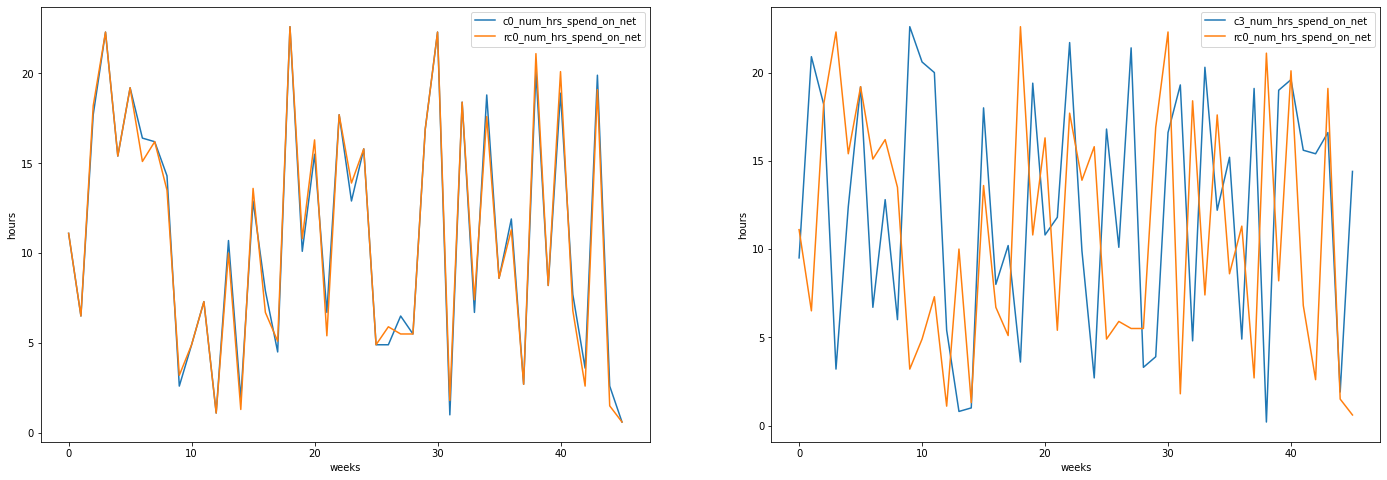

In [34]:
plt.rcParams["figure.figsize"] = (24,8)

plt.subplot(1,2,1)
ax1 = dv1.plot.line(y=['c0_num_hrs_spend_on_net','rc0_num_hrs_spend_on_net'], ax=plt.gca())
plt.xlabel('weeks')
plt.ylabel('hours')

plt.subplot(1,2,2)
ax2 = dv2.plot.line(y=['c3_num_hrs_spend_on_net','rc0_num_hrs_spend_on_net'], ax=plt.gca())
plt.xlabel('weeks')
plt.ylabel('hours')

plt.show()

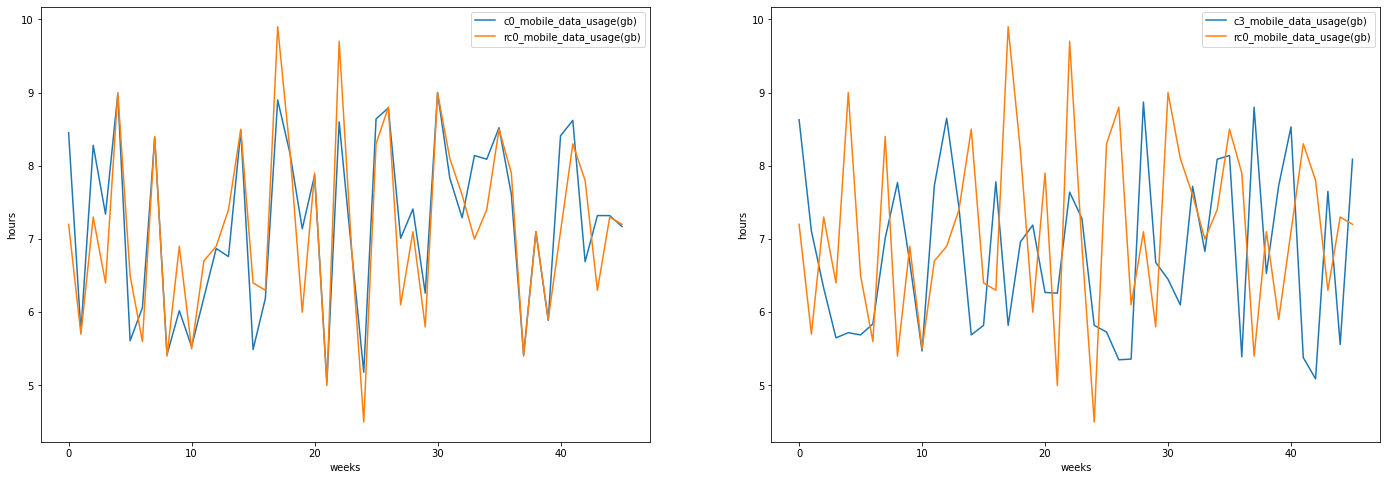

In [35]:
plt.subplot(1,2,1)
ax1 = dv1.plot.line(y=['c0_mobile_data_usage(gb)','rc0_mobile_data_usage(gb)'], ax=plt.gca())
plt.xlabel('weeks')
plt.ylabel('hours')

plt.subplot(1,2,2)
ax2 = dv2.plot.line(y=['c3_mobile_data_usage(gb)','rc0_mobile_data_usage(gb)'], ax=plt.gca())
plt.xlabel('weeks')
plt.ylabel('hours')

plt.show()